<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20MNB-MLP%20for%204%20class%20classifications%20based%20on%20WSNBFSF%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid MNB-MLP for 4 class classifications based on WSNBFSF dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load dataset
dataset = pd.read_csv("dataset.csv")
dataset.isnull().sum()

Event             0
Time              0
S_Node            0
Node_id           0
Rest_Energy       0
Trace_Level       0
Mac_Type_Pckt     0
Source_IP_Port    0
Des_IP_Port       0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
Class             0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312106 entries, 0 to 312105
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Event           312106 non-null  int64  
 1   Time            312106 non-null  float64
 2   S_Node          312106 non-null  int64  
 3   Node_id         312106 non-null  int64  
 4   Rest_Energy     312106 non-null  float64
 5   Trace_Level     312106 non-null  int64  
 6   Mac_Type_Pckt   312106 non-null  int64  
 7   Source_IP_Port  312106 non-null  float64
 8   Des_IP_Port     312106 non-null  float64
 9   Packet_Size     312106 non-null  int64  
 10  TTL             312106 non-null  int64  
 11  Hop_Count       312106 non-null  int64  
 12  Broadcast_ID    312106 non-null  int64  
 13  Dest_Node_Num   312106 non-null  int64  
 14  Dest_Seq_Num    312106 non-null  int64  
 15  Src_Node_ID     312106 non-null  int64  
 16  Src_Seq_Num     312106 non-null  int64  
 17  Class     

### **Data Preprocessing**

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=4)
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X.shape)
print(y.shape)

(312106, 17)
(312106, 4)


In [5]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Hybrid MNB-DNN for 4 Class**

In [7]:
# Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, np.argmax(y_train, axis=1))

y_pred_mnb = mnb.predict(X_test)
y_pred_mnb = np_utils.to_categorical(y_pred_mnb, num_classes=4)

from sklearn.metrics import accuracy_score

# Calculate accuracy for Multinomial Naive Bayes model
accuracy_mnb = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred_mnb, axis=1))
print("Multinomial Naive Bayes Accuracy:", accuracy_mnb)

Multinomial Naive Bayes Accuracy: 0.6168983407916074


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from keras.utils import to_categorical

# MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train, np.argmax(y_train, axis=1))

y_pred_mlp = mlp_model.predict(X_test)
y_pred_mlp = to_categorical(y_pred_mlp, num_classes=4)

# Evaluate the MLP model
mlp_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred_mlp, axis=1))
print("MLP Model Classification Report:")
print(mlp_report)

MLP Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     52500
           1       0.90      0.98      0.94     52554
           2       0.98      1.00      0.99     52545
           3       0.98      0.97      0.98     52682

    accuracy                           0.96    210281
   macro avg       0.96      0.96      0.96    210281
weighted avg       0.96      0.96      0.96    210281



In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.utils import np_utils

# Combine models
y_pred = y_pred_mnb * 0.6 + y_pred_mlp * 0.4
y_pred = np.argmax(y_pred, axis=1)

# Evaluation metrics
print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57     52500
           1       0.52      0.54      0.53     52554
           2       0.55      0.37      0.44     52545
           3       0.76      1.00      0.87     52682

    accuracy                           0.62    210281
   macro avg       0.60      0.62      0.60    210281
weighted avg       0.60      0.62      0.60    210281

[[29233 14263  6828  2176]
 [ 8098 28604  8973  6879]
 [13395 12608 19205  7337]
 [    0     0     2 52680]]


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid MNB-MLP Model


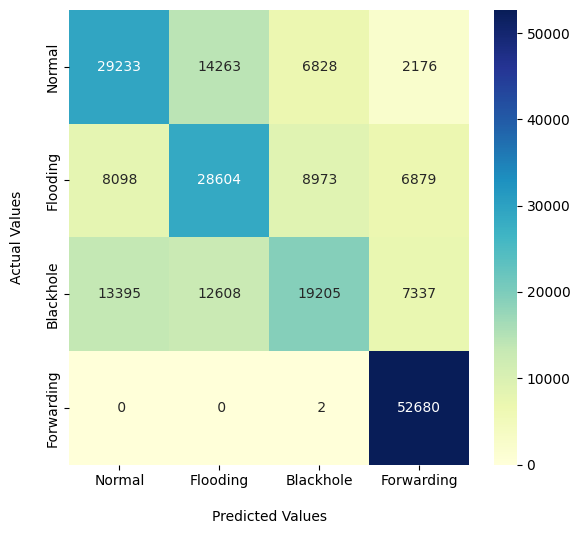

In [12]:
print("Confusion Matrix of Hybrid MNB-MLP Model") 
conf_mat(np.argmax(y_test, axis=1), y_pred)

In [14]:
report = classification_report(np.argmax(y_test, axis=1), y_pred, output_dict=True)
detection_rates = {}
for cls in range(4):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates:", detection_rates)

Detection rates: {0: 0.5565142857142857, 1: 0.5460669026144537, 2: 0.3600913502711961, 3: 1.0}
